# BBC News Classification
![BBC News Dataset](https://drive.google.com/uc?id=1MudNF4e-3mUVzZDItdgopG06g9YDLP61)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 1: Import Required Libraries
In this step, we import all the necessary libraries for data manipulation, natural language processing (NLP), and machine learning, including libraries like pandas, NumPy, Matplotlib, NLTK, and scikit-learn.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from nltk.corpus import stopwords
from collections import Counter # Importing the Counter object
import nltk
from wordcloud import WordCloud , STOPWORDS
from nltk.corpus import stopwords
import string  # Import string module for punctuation
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Step 2: Load Dataset
Here, we load the dataset from the specified location on Google Drive. The dataset is read using pandas and stored in the DataFrame `df`. We then display the first few rows to understand its structure.


In [ ]:
# Read our dataset using read_csv()
bbc_text = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/bbc-text.csv')
bbc_text=bbc_text.rename(columns = {'text': 'News_Headline'}, inplace = False)
bbc_text.head()

,category,News_Headline
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### Step 3: Dataset Summary and Statistics
In this step, we perform a basic statistical overview of the dataset:
- **df.describe()**: Provides summary statistics of numerical columns.
- **df.info()**: Displays information about the dataset, including data types and non-null counts.
- We then print the shape, columns, and unique categories in the 'category' column to understand the dataset structure.
- We also display the count of each category and check for missing values in the dataset.
- Finally, we generate statistics on the length of the text in each entry.


In [ ]:
# prompt: stats

# Display summary statistics
bbc_text.describe()

# Display information about the dataset
bbc_text.info()

# Print the shape of the DataFrame
print("\nShape of the DataFrame:", bbc_text.shape)

# Print the columns of the DataFrame
print("\nColumns of the DataFrame:", bbc_text.columns)

# Print unique categories
print("\nUnique categories:", bbc_text['category'].unique())

# Display the count of each category
print("\nCategory counts:\n", bbc_text['category'].value_counts())

# Check for missing values
print("\nMissing values:\n", bbc_text.isnull().sum())

# Generate statistics on the length of the text
bbc_text['News_Headline_length'] = bbc_text['News_Headline'].apply(len)
print("\nStatistics on the length of the text:\n", bbc_text['News_Headline_length'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       2225 non-null   object
 1   News_Headline  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB

Shape of the DataFrame: (2225, 2)

Columns of the DataFrame: Index(['category', 'News_Headline'], dtype='object')

Unique categories: ['tech' 'business' 'sport' 'entertainment' 'politics']

Category counts:
 category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

Missing values:
 category         0
News_Headline    0
dtype: int64

Statistics on the length of the text:
 count     2225.00000
mean      2262.93618
std       1364.10253
min        501.00000
25%       1446.00000
50%       1965.00000
75%       2802.00000
max      25483.00000
Name: News_Headline_length, dtype: float64


### Step 4: Data Visualization - Number of Headlines per Category
In this step, we use a bar plot to visualize the distribution of headlines across different categories.
- **sns.countplot()**: This function is used to create a count plot, which displays the number of headlines in each category.
- The **'Set2'** palette is used to improve the visual appeal.


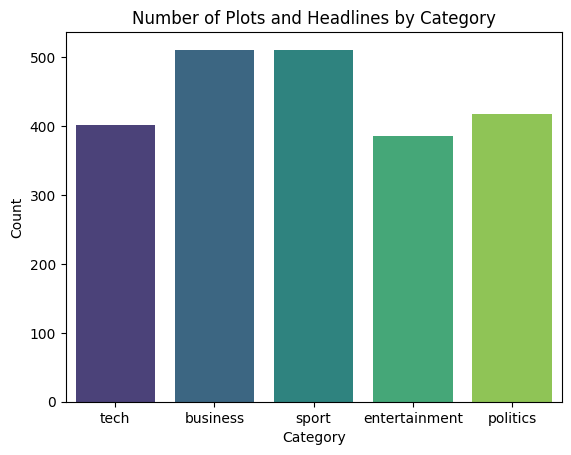

In [ ]:
sns.countplot(x=bbc_text.category, hue=bbc_text.category, palette="viridis", legend=False)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Plots and Headlines by Category')
plt.show()


### Visualizing Top 10 Stopwords
This function displays a bar chart of the 10 most common stopwords in the dataset. It:
- Splits the text data into words.
- Counts how often each stopword appears.
- Plots the top 10 stopwords using Seaborn's color palette.

This helps us identify commonly used words that may not add much value for text classification.


<ipython-input-6-9f7fa3e0a54f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(x), y=list(y), palette=sns.color_palette("viridis", len(x)))


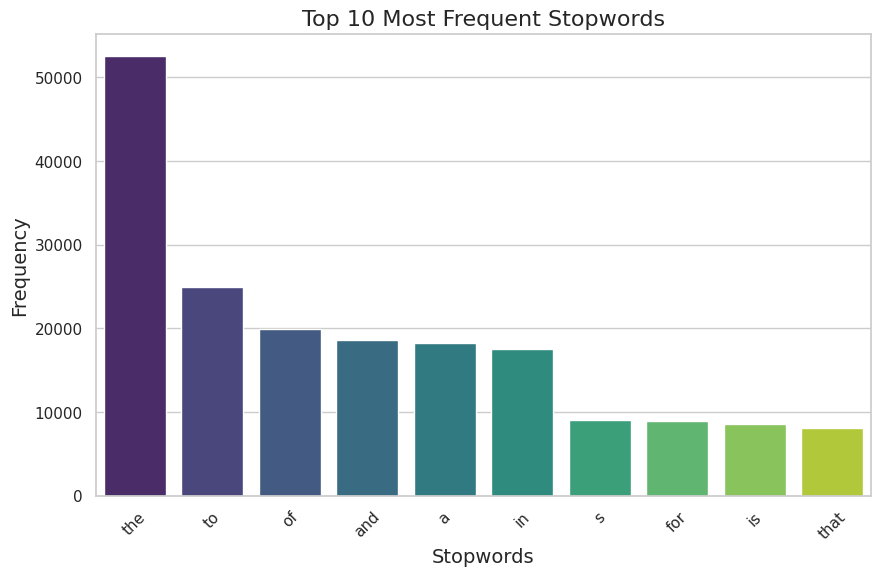

In [ ]:
def plot_stopwords(data):
    stop = set(stopwords.words('english'))
    data_split = data.str.split()
    data_list = data_split.values.tolist()
    corpus = [word for i in data_list for word in i]

    dictionary_stopwords = defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word] += 1

    top = sorted(dictionary_stopwords.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*top)

    # Use Seaborn's barplot with Viridis
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(x), y=list(y), palette=sns.color_palette("viridis", len(x)))

    # Add titles and labels
    plt.title('Top 10 Most Frequent Stopwords', fontsize=16)
    plt.xlabel('Stopwords', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Call the function
plot_stopwords(bbc_text['News_Headline'])


### Visualizing Top 100 Frequent Words
This function:
- Splits the text data into words.
- Counts the frequency of each word (excluding stopwords).
- Plots the 100 most frequent words in a bar chart using Seaborn.

The chart helps visualize the most common and important words in the dataset that are useful for text analysis.


<ipython-input-7-87c147434e78>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y,y=x,palette='viridis' ,legend=False)


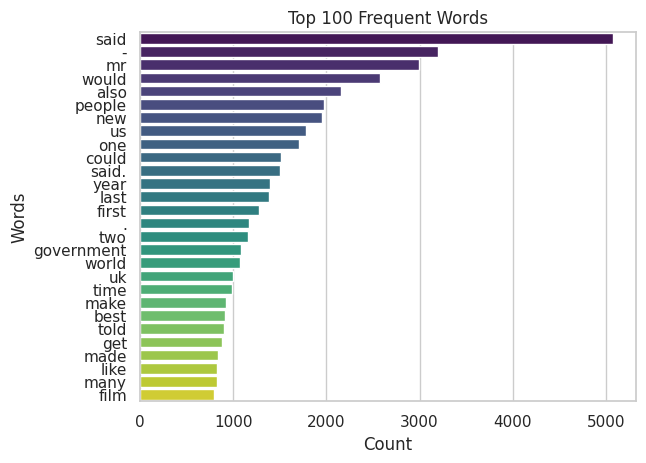

In [ ]:
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,palette='viridis' ,legend=False)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 100 Frequent Words')
    plt.show()
top_frequent_words(bbc_text['News_Headline'])

### Word Cloud Visualization
This function:
- Joins all text data into one large string.
- Generates a word cloud to visualize the most frequent words in the dataset.
- Displays the word cloud with custom settings for clarity and aesthetics.

Word clouds are useful for quickly identifying the most prominent words in a large text corpus.


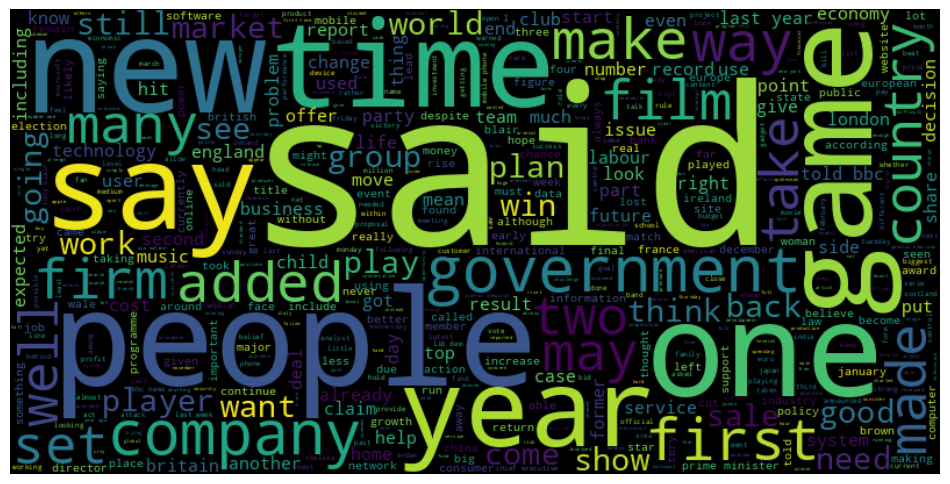

In [ ]:
# Preprocessing the text data
def preprocess_text(data):
    stop = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_data = []

    # Tokenization, stopword removal, and lemmatization
    for text in data:
        tokens = word_tokenize(text.lower())  # Tokenize and lowercase the text
        tokens = [word for word in tokens if word.isalnum() and word not in stop]  # Remove stopwords and non-alphanumeric tokens
        tokens = [lemmatizer.lemmatize(word) for word in tokens if len(word) > 2]  # Lemmatization
        processed_data.append(' '.join(tokens))  # Join tokens back into text

    return ' '.join(processed_data)  # Join the entire corpus into one string

# Word Cloud Plotting
def plot_wordcloud(data):
    # Preprocess the text data
    cleaned_text = preprocess_text(data)

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400,
        background_color='black',
        stopwords=STOPWORDS,
        max_words=500,
    ).generate(cleaned_text)

    # Plot the WordCloud
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

plot_wordcloud(bbc_text['News_Headline'])


##Step 4: Data Preprocessing

### Lowercasing the Text Data
This step:
- Converts all text in the dataset to lowercase to ensure consistency.
- Helps eliminate issues where the same word in different cases would be treated as different words.

Converting to lowercase is a common preprocessing step before text analysis to standardize the input data.


In [ ]:
bbc_text = bbc_text.apply(lambda x: x.astype(str).str.lower())

## Tokenization
In this step, the text is split into individual words or tokens:
- **Purpose**: Tokenization helps in breaking down the text into smaller, manageable pieces (words or tokens).
- **Why Important**: It's the foundational step for many NLP tasks like text classification, sentiment analysis, and topic modeling.

The `word_tokenize` function from NLTK is used here to break the text into tokens, and a new column `cleaned` is created in the DataFrame to store these tokenized words.


In [ ]:
# Tokenization
bbc_text['text_clean'] = bbc_text['News_Headline'].apply(nltk.word_tokenize)
print('Step 1-Tokenization Done!.')
bbc_text.head()

Step 1-Tokenization Done!.


,category,News_Headline,News_Headline_length,text_clean
0,tech,tv future in the hands of viewers with home th...,4333,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,1842,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,1342,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,2176,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,"[ocean, s, twelve, raids, box, office, ocean, ..."


### Removing Stopwords and Punctuation

In this step, we remove both stopwords (common words like "the", "is", etc.) and punctuation from the tokenized text. This helps to clean the data and focus on meaningful words for analysis. The cleaned tokens are stored in a new column for further processing.


In [ ]:

if len(bbc_text)==1:
  stop_words = set(stopwords.words('english'))
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
else:
  stop_words=set(nltk.corpus.stopwords.words("english"))
  bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
  print('Step 2-All stop words are removed from the list.')
  print(bbc_text.head(5))

Step 2-All stop words are removed from the list.
        category                                      News_Headline  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

  News_Headline_length                                         text_clean  
0                 4333  [tv, future, hands, viewers, home, theatre, sy...  
1                 1842  [worldcom, boss, left, books, alone, former, w...  
2                 1342  [tigers, wary, farrell, gamble, leicester, say...  
3                 2176  [yeading, face, newcastle, fa, cup, premiershi...  
4                 1579  [ocean, twelve, raids, box, office, ocean, twe...  


Stemming and Lemmatization





### Stemming

Lemmatization is the process of converting words to their base or root form. For example, "running" becomes "run". This step helps reduce inflected words to their base form, making the data more uniform. We apply lemmatization to the tokenized words to prepare them for further analysis or model training.




In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
bbc_text["text_clean"] = bbc_text["text_clean"].apply(lambda x: [stemmer.stem(y) for y in x])
bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda tokens: ' '.join(tokens))
print('Step 3-Lemmatization Done!.')
bbc_text.head()

Step 3-Lemmatization Done!.


,category,News_Headline,News_Headline_length,text_clean
0,tech,tv future in the hands of viewers with home th...,4333,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelv raid box offic ocean twelv crime c...


## Step 5 : Feature Extraction
### TF-IDF Vectorization

In this step, we apply TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to transform the cleaned text data into numerical vectors. TF-IDF helps highlight important terms in each document while reducing the weight of common terms. This vectorized data is then ready for machine learning modeling.


In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=2000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,2))

tf_idf1 = tf_idf.fit_transform(bbc_text['text_clean'])

tf_idf1 = tf_idf1.toarray()
print('Step 4-TF-IDF Done!.')
print(tf_idf1)

Step 4-TF-IDF Done!.
[[0.02272293 0.         0.         ... 0.         0.         0.        ]
 [0.0263531  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.03533005 0.         0.07408574 ... 0.         0.         0.        ]
 [0.02433489 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<ipython-input-14-036a534225af>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_TFIDF_Score', y='Feature', data=tfidf_df, palette='viridis')


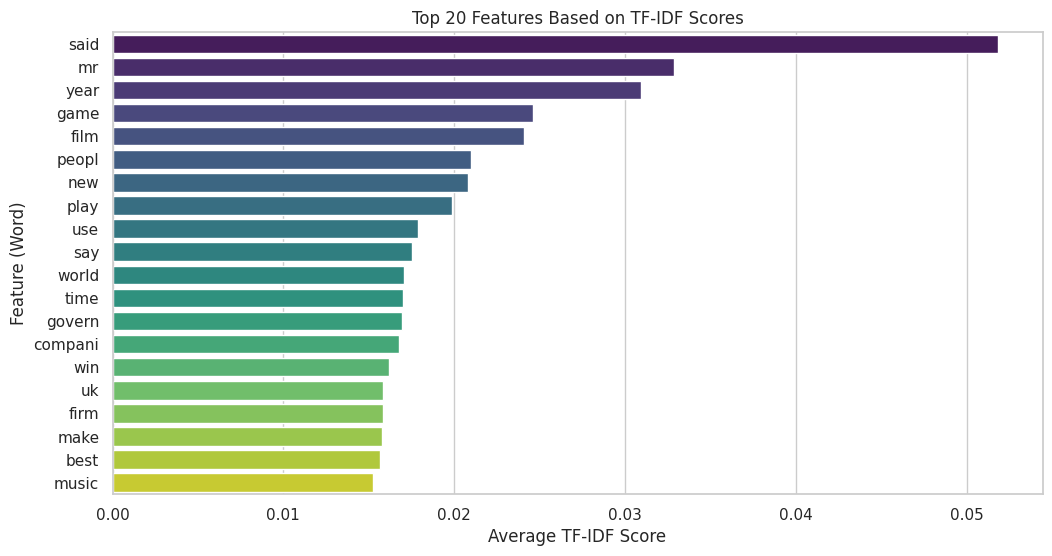

In [ ]:

# Get feature names (words) from TF-IDF
feature_names = tf_idf.get_feature_names_out()

# Get the average TF-IDF score for each feature in the training data
avg_tfidf_scores = tf_idf.transform(bbc_text['text_clean']).mean(axis=0).A1

# Create a DataFrame of feature names and their corresponding average TF-IDF scores
tfidf_df = pd.DataFrame(list(zip(feature_names, avg_tfidf_scores)), columns=['Feature', 'Avg_TFIDF_Score'])
tfidf_df = tfidf_df.sort_values(by='Avg_TFIDF_Score', ascending=False).head(20)

# Plot the top 20 words with the highest TF-IDF scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_TFIDF_Score', y='Feature', data=tfidf_df, palette='viridis')
plt.title('Top 20 Features Based on TF-IDF Scores')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Feature (Word)')
plt.show()


### Mapping Categories to Numerical Labels

In this step, we convert the text-based categories (e.g., 'tech', 'business', etc.) into numerical values for machine learning models. Each category is assigned a unique integer, simplifying the model's processing of categorical data.


In [ ]:

bbc_text.category = bbc_text.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
categories = list(bbc_text['category'].unique())
bbc_text.category.unique()



array([0, 1, 2, 3, 4])

## Step 6: Model Training
### Splitting Data into Training and Testing Sets

In this step, we split the dataset into training and testing subsets. 70% of the data is used for training, and the remaining 30% is used for testing. This helps in evaluating the model's performance on unseen data.


In [ ]:
X = bbc_text.text_clean
y = bbc_text.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1780,) (445,) (1780,) (445,)


In [ ]:

# from sklearn.feature_extraction.text import CountVectorizer
# vector = CountVectorizer(stop_words = 'english',lowercase=False)
# # fit the vectorizer on the training data
# vector.fit(X_train)
# vector.vocabulary_
# X_transformed = vector.transform(X_train)
# X_transformed.toarray()
# # for test data
# X_test_transformed = vector.transform(X_test)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tf_idf = TfidfVectorizer(max_features=2000, lowercase=True, analyzer='word',
                         stop_words='english', ngram_range=(1,2))

# Fit on training data and transform both train and test sets
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

# Verify shapes
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape:", X_test_tfidf.shape)


TF-IDF Train Shape: (1780, 2000)
TF-IDF Test Shape: (445, 2000)


### Data Split Visualization

This step visualizes the distribution of training and test data using a pie chart.


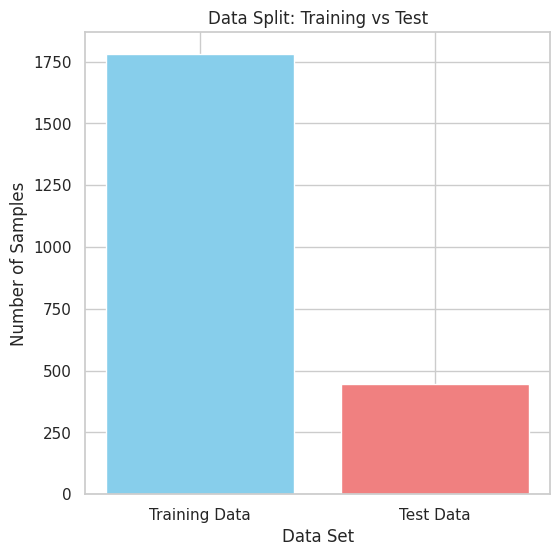

In [ ]:
# Get the number of samples in train and test sets
train_size = len(X_train)
test_size = len(X_test)

# Create a pie chart or bar chart
labels = ['Training Data', 'Test Data']
sizes = [train_size, test_size]

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=['skyblue', 'lightcoral'])
plt.title("Data Split: Training vs Test")
plt.xlabel('Data Set')
plt.ylabel('Number of Samples')
plt.show()




checking paramters

In [ ]:
print(y_train.isna().sum())  # To count NaN values in y_train


0


### Random Forest

- Train a Random Forest model on the TF-IDF transformed data.
- Use the training data to fit the model.
- Make predictions on the test data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9662921348314607

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        80
           1       0.93      0.96      0.95       102
           2       0.98      0.99      0.99       102
           3       0.99      0.97      0.98        77
           4       0.98      0.96      0.97        84

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



## **Model Evaluation**


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report for precision, recall, F1-score
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9663
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        80
           1       0.93      0.96      0.95       102
           2       0.98      0.99      0.99       102
           3       0.99      0.97      0.98        77
           4       0.98      0.96      0.97        84

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



## **Model Testing**

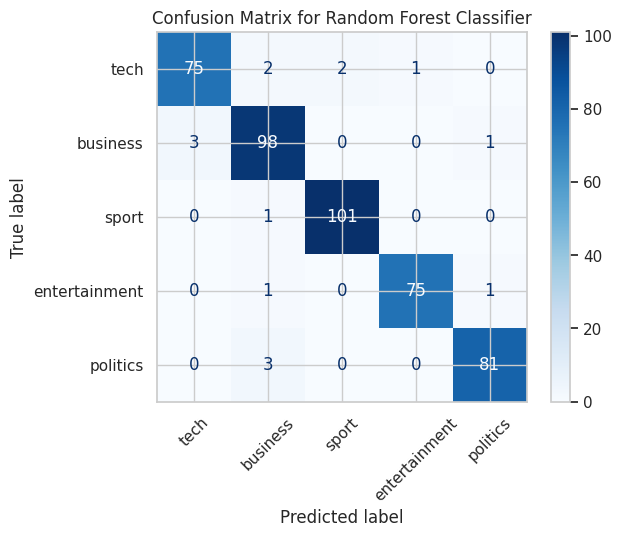

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the category labels for display (e.g., ['tech', 'business', 'sport', 'entertainment', 'politics'])
category_names = ['tech', 'business', 'sport', 'entertainment', 'politics']

# Predict on the test set using transformed data
y_pred = rf_classifier.predict(X_test_tfidf)  # Use X_test_tfidf for transformed test data

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=range(len(category_names)))  # Ensure categories match labels

# Plot confusion matrix with category names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


In [ ]:
# Define the categories for mapping
categories = ['TECH', 'BUSINESS', 'SPORTS', 'ENTERTAINMENT', 'POLITICS']

# Assuming the trained Random Forest classifier (rf_classifier) and TF-IDF vectorizer (tf_idf) are loaded
# You would need to load your pre-trained rf_classifier and tf_idf if this were a full script

# Interface to get user input
def classify_headline():
    # Take headline input from user
    headline = input("Enter the headline to classify: ")

    # Preprocess the input (tokenize, lowercase, remove stopwords) using the existing tf-idf transformer
    headline_tfidf = tf_idf.transform([headline]).toarray()

    # Predict the category using the trained Random Forest classifier
    predicted_label_index = rf_classifier.predict(headline_tfidf)[0]
    predicted_category = categories[predicted_label_index]

    # Display the result
    print(f"Predicted Category: {predicted_category}")

# Call the function to classify the headline
classify_headline()


Enter the headline to classify: The rapid evolution of digital systems has led to significant improvements in applications across various sectors. With the rise of data processing frameworks and cloud computing, businesses can now deploy scalable solutions for handling large datasets efficiently. High-frequency concepts like algorithm optimization, network integration, and real-time analytics are central to these advancements.  Emerging trends in machine learning and data science continue to redefine how organizations leverage information. Neural networks and automated systems are deployed to improve process efficiency and develop intelligent models for predictive analysis. Meanwhile, cybersecurity protocols are evolving to safeguard sensitive user data against potential breaches in a hyper-connected world.  As these developments unfold, the integration of IoT devices, distributed computing, and artificial intelligence frameworks ensures a dynamic and interconnected ecosystem, driving 